In [1]:
# importing the library 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline 

In [2]:
# reading the data 
d= pd.read_excel(r"C:\Users\Hanno\Desktop\Data Glacier\Team Project\HealthcareDataset.xlsx")

In [3]:
#getting the data information by looking at the number of rows and columns 
d.shape

(3424, 69)

In [4]:
#unique variables 
pd.set_option('display.max_rows', None)
d.nunique()

Ptid                                                                  3424
Persistency_Flag                                                         2
Gender                                                                   2
Race                                                                     4
Ethnicity                                                                3
Region                                                                   5
Age_Bucket                                                               4
Ntm_Speciality                                                          36
Ntm_Specialist_Flag                                                      2
Ntm_Speciality_Bucket                                                    3
Gluco_Record_Prior_Ntm                                                   2
Gluco_Record_During_Rx                                                   2
Dexa_Freq_During_Rx                                                     58
Dexa_During_Rx           

In [5]:
#null values 
d.isnull()

Ptid  Persistency_Flag  Gender   Race  Ethnicity  Region  Age_Bucket  \
0     False             False   False  False      False   False       False   
1     False             False   False  False      False   False       False   
2     False             False   False  False      False   False       False   
3     False             False   False  False      False   False       False   
4     False             False   False  False      False   False       False   
5     False             False   False  False      False   False       False   
6     False             False   False  False      False   False       False   
7     False             False   False  False      False   False       False   
8     False             False   False  False      False   False       False   
9     False             False   False  False      False   False       False   
10    False             False   False  False      False   False       False   
11    False             False   False  False      False   False       False   
12    False             False   False  False      False   False       False   
13    False             False   False  False      False   False       False   
14    False             False   False  False      False   False       False   
15    False             False   False  False      False   False       False   
16    False             False   False  False      False   False       False   
17    False             False   False  False      False   False       False   
18    False             False   False  False      False   False       False   
19    False             False   False  False      False   False       False   
20    False             False   False  False      False   False       False   
21    False             False   False  False      False   False       False   
22    False             False   False  False      False   False       False   
23    False             False   False  False      False   False       False   
24    False             False   False  False      False   False       False   
25    False             False   False  False      False   False       False   
26    False             False   False  False      False   False       False   
27    False             False   False  False      False   False       False   
28    False             False   False  False      False   False       False   
29    False             False   False  False      False   False       False   
30    False             False   False  False      False   False       False   
31    False             False   False  False      False   False       False   
32    False             False   False  False      False   False       False   
33    False             False   False  False      False   False       False   
34    False             False   False  False      False   False       False   
35    False             False   False  False      False   False       False   
36    False             False   False  False      False   False       False   
37    False             False   False  False      False   False       False   
38    False             False   False  False      False   False       False   
39    False             False   False  False      False   False       False   
40    False             False   False  False      False   False       False   
41    False             False   False  False      False   False       False   
42    False             False   False  False      False   False       False   
43    False             False   False  False      False   False       False   
44    False             False   False  False      False   False       False   
45    False             False   False  False      False   False       False   
46    False             False   False  False      False   False       False   
47    False             False   False  False      False   False       False   
48    False             False   False  False      False   False       False   
49    False             False   False  False      False  

In [6]:
#counting the null values 
d.isnull().count()

Ptid                                                                  3424
Persistency_Flag                                                      3424
Gender                                                                3424
Race                                                                  3424
Ethnicity                                                             3424
Region                                                                3424
Age_Bucket                                                            3424
Ntm_Speciality                                                        3424
Ntm_Specialist_Flag                                                   3424
Ntm_Speciality_Bucket                                                 3424
Gluco_Record_Prior_Ntm                                                3424
Gluco_Record_During_Rx                                                3424
Dexa_Freq_During_Rx                                                   3424
Dexa_During_Rx           

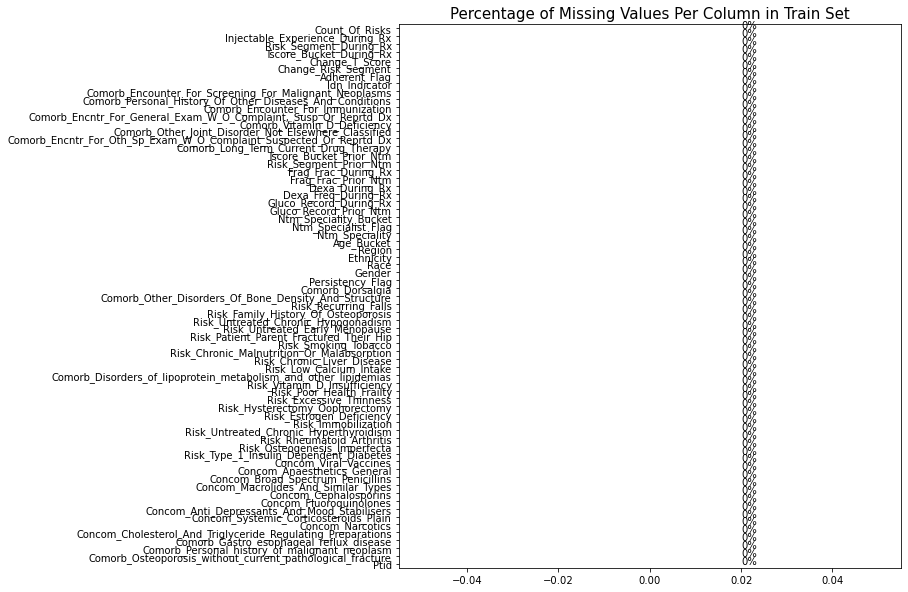

In [12]:
#check for missing values again
ax = d.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/d.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))


In [13]:
#categorical column list
cat_cols = list(d.select_dtypes(['object']).columns)
print(len(cat_cols))

67


In [14]:
#column of numerical columns
num_cols = list(d.select_dtypes(['int64']).columns)
print(len(num_cols))
num_cols

2


['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [27]:
# PERFPROMING THE CORRELATION BEFORE OUTLIERS AND SKEW DATA
#correlation using numpy
np.corrcoef(d['Dexa_Freq_During_Rx'],d['Count_Of_Risks'])

array([[1.        , 0.01396392],
       [0.01396392, 1.        ]])

In [30]:
#correlation using scipy 
st.pearsonr(d['Dexa_Freq_During_Rx'],d['Count_Of_Risks'])

(0.013963920356771475, 0.4140200697384372)

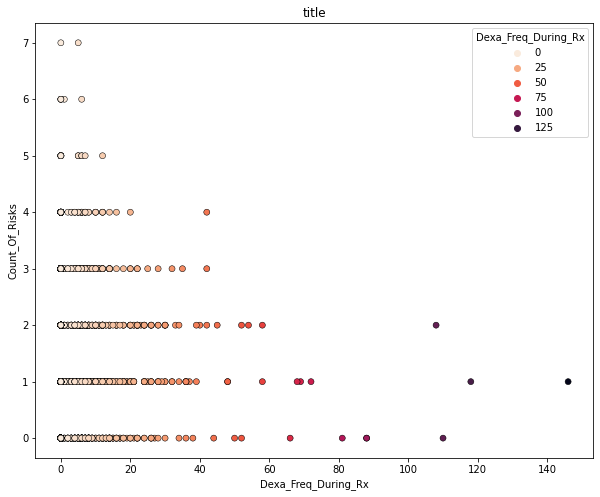

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    x='Dexa_Freq_During_Rx',
    y='Count_Of_Risks',
    data=d,
    hue='Dexa_Freq_During_Rx',
    edgecolor='black',
    palette='rocket_r',
    linewidth=0.5,
    ax=ax
)
ax.set(
    title='title',
    xlabel='Dexa_Freq_During_Rx',
    ylabel='Count_Of_Risks',
    facecolor='white'
);


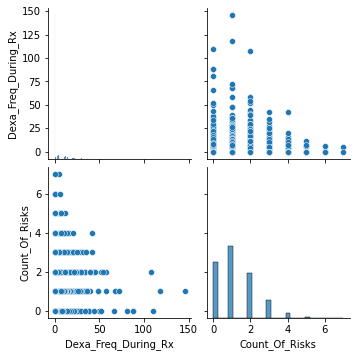

In [33]:
sns.pairplot(d)

<AxesSubplot:>

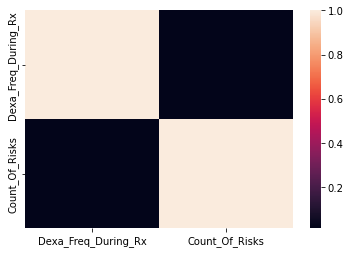

In [34]:
sns.heatmap(d.corr())